# Plot grad norm result

err
err
err
err
err


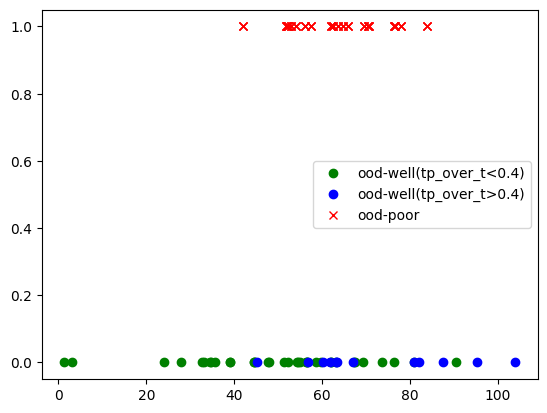

In [111]:
pth = "/gallery_louvre/dayoon.ko/research/sds/FlagEmbedding/FlagEmbedding/BGE_M3/"

def load_file(pth):
    with open(pth) as f:
        lines = f.readlines() 
    return lines 

def get_score_list(pth):
    lines = load_file(pth)
    gns = []
    for l in lines:
        try:
            sid = l.index("tensor(") + len("tensor(") 
            eid = sid + 5
            gns.append(float(l[sid:eid]))
        except:
            print("err")
            continue
    return gns 
    
ood_well_pth_o = pth + "id_o"
ood_well_o = get_score_list(ood_well_pth_o)

ood_well_pth_b = pth + "id_b"
ood_well_b = get_score_list(ood_well_pth_b)

ood_poor_pth = pth + "ood"
ood_poor = get_score_list(ood_poor_pth)

import matplotlib.pyplot as plt 
plt.figure()
plt.plot(ood_well_b, len(ood_well_b) * [0], "o" , label = "ood-well(tp_over_t<0.4)", color="green")
plt.plot(ood_well_o, len(ood_well_o) * [0], "o" , label = "ood-well(tp_over_t>0.4)", color="blue")
plt.plot(ood_poor, len(ood_poor) * [1], "x" , label = "ood-poor", color="red")
plt.legend()
 

/tmp/ipykernel_3849050/3016394018.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


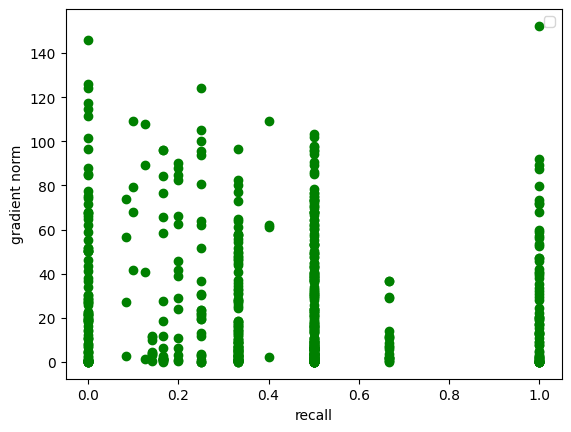

In [67]:
pth = "/gallery_louvre/dayoon.ko/research/sds/FlagEmbedding/FlagEmbedding/BGE_M3/"

def load_file(pth):
    with open(pth) as f:
        lines = f.readlines() 
    return lines 
    
def get_recall_and_score_list(pth):
    lines = load_file(pth)
    gradnorms = []
    for l in lines:
        try: 
            sid = l.index("tensor(") + len("tensor(") 
            eid = sid + 5
            gradnorms.append(float(l[sid:eid]))
        except:
            continue
    recalls = []
    for l in lines:
        try: 
            sid = l.index("recall: ") + len("recall: ") 
            eid = sid + 5
            recalls.append(float(l[sid:eid].strip()))
        except:
            continue
    return recalls, gradnorms 



ood_all = pth + "ood_all"
recalls, gradnorms = get_recall_and_score_list(ood_all)

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(recalls, gradnorms,  color="green")
plt.xlabel("recall")
plt.ylabel("gradient norm")
#plt.plot(ood_well_o, len(ood_well_o) * [0], "o" , label = "ood-well(tp_over_t>0.4)", color="blue")
#plt.plot(ood_poor, len(ood_poor) * [1], "x" , label = "ood-poor", color="red")
plt.legend()
 

588 588 588 588


/tmp/ipykernel_3849050/4255728412.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


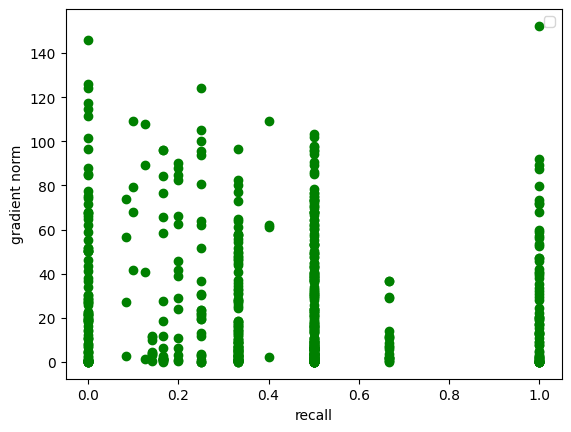

In [111]:
pth = "/gallery_louvre/dayoon.ko/research/sds/FlagEmbedding/FlagEmbedding/BGE_M3/"

def load_file(pth):
    with open(pth) as f:
        lines = f.readlines() 
    return lines 
    
def get_recall_and_score_list(pth):
    lines = load_file(pth)
    gradnorms = []
    for l in lines:
        try: 
            sid = l.index("tensor(") + len("tensor(") 
            eid = sid + 5
            gradnorms.append(float(l[sid:eid]))
        except:
            continue
    recalls = []
    for l in lines:
        try: 
            sid = l.index("recall: ") + len("recall: ") 
            eid = sid + 5
            recalls.append(float(l[sid:eid].strip()))
        except:
            continue
    scores = []
    for l in lines:
        try: 
            sid = l.index("[") 
            values = [round(float(i),1) for i in l[sid+1:-2].split(", ")]
            scores.append(values)
        except Exception as e:
            continue
    ids = []
    for l in lines:
        try:
            sid = l.index("doc_id: ") + len("doc_id: ") 
            eid = sid
            ids.append(l[sid:].strip())
        except:
            continue
            
    return recalls, gradnorms, scores, ids



ood_all = pth + "ood_all"
recalls, gradnorms, scores, ids = get_recall_and_score_list(ood_all)
print(len(recalls), len(gradnorms), len(scores), len(ids))

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(recalls, gradnorms, color="green")
plt.xlabel("recall")
plt.ylabel("gradient norm")
#plt.plot(ood_well_o, len(ood_well_o) * [0], "o" , label = "ood-well(tp_over_t>0.4)", color="blue")
#plt.plot(ood_poor, len(ood_poor) * [1], "x" , label = "ood-poor", color="red")
plt.legend()
 

## OOD all consecutive

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


250 250 250


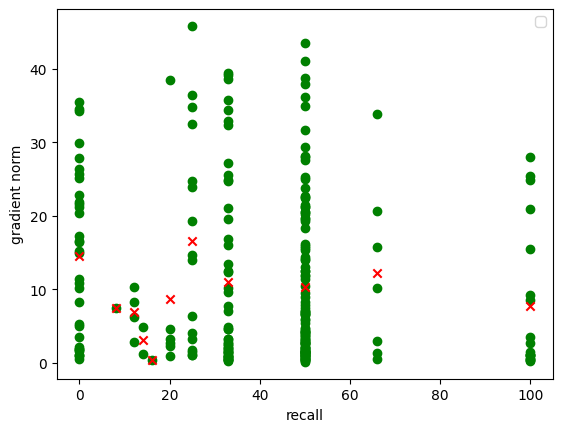

In [18]:
pth = "/gallery_louvre/dayoon.ko/research/sds/FlagEmbedding/FlagEmbedding/BGE_M3/"

def load_file(pth):
    with open(pth) as f:
        lines = f.readlines() 
    return lines 
    
def get_recall_and_score_list(pth):
    lines = load_file(pth)
    gradnorms = []
    for l in lines:
        try: 
            sid = l.index("tensor(") + len("tensor(") 
            eid = sid + 5
            gradnorms.append(float(l[sid:eid]))
        except:
            continue
    recalls = []
    for l in lines:
        try: 
            sid = l.index("recall: ") + len("recall: ") 
            eid = sid + 5
            recalls.append(int(float(l[sid:eid].strip()) * 100))
        except:
            continue
    ids = []
    for l in lines:
        try:
            sid = l.index("doc_id: ") + len("doc_id: ") 
            eid = sid
            ids.append(l[sid:].strip())
        except:
            continue

    gradnorms_selected = []
    recalls_selected = []
    ids_selected = []
    func = min #lambda x: sum(x) / len(x)
    for i in range(0, len(ids), 4):
        gradnorms_selected.append(func(gradnorms[i:i+4]))
        recalls_selected.append(func(recalls[i:i+4]))
        ids_selected.append(ids[i])
            
    return recalls_selected, gradnorms_selected, ids_selected



ood_all = pth + "ood_all"
recalls, gradnorms, ids = get_recall_and_score_list(ood_all)
print(len(recalls), len(gradnorms), len(ids))

import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(recalls, gradnorms, color="green")
plt.xlabel("recall")
plt.ylabel("gradient norm")
#plt.plot(ood_well_o, len(ood_well_o) * [0], "o" , label = "ood-well(tp_over_t>0.4)", color="blue")
#plt.plot(ood_poor, len(ood_poor) * [1], "x" , label = "ood-poor", color="red")

means = {k: [] for k in set(recalls)}
for r, g in zip(recalls, gradnorms):
    means[r].append(g)
means = {k: sum(v) / len(v) for k, v in means.items()}
means = sorted(list(means.items()), key= lambda x: int(x[0]))
xs = [i[0] for i in means]
ys = [i[1] for i in means]
plt.scatter(xs, ys, marker="x", color="red")
plt.legend()
 

In [113]:
data = {
    "_id": ids,
    "recall": recalls,
    "grad_norms": gradnorms,
    "scores": scores
}
import pandas as pd
df = pd.DataFrame(data)
df = df.sort_values("recall")

In [114]:
df.head(20)

,_id,recall,grad_norms,scores
170,qvz63m93,0.0,67.400,"[93.6, 91.5, 92.2, 92.0, 92.1, 92.1]"
162,qvz63m93,0.0,77.260,"[93.8, 92.7, 92.6, 92.3, 92.7, 91.2]"
157,8t35z4gl,0.0,30.120,"[94.1, 90.4, 91.8, 90.5, 90.0, 90.1]"
150,wm6yey1v,0.0,0.365,"[95.2, 87.4, 85.5, 87.5, 87.3, 86.9]"
485,s33brsk6,0.0,0.200,"[98.4, 90.7, 90.2, 89.9, 89.7, 89.5]"
406,sqrn6kjy,0.0,46.190,"[94.3, 90.1, 88.1, 92.0, 91.9, 91.9]"
404,023h20vk,0.0,20.100,"[94.3, 90.3, 90.7, 91.0, 90.9, 90.5]"
402,gdl4l9xo,0.0,84.910,"[92.5, 91.4, 91.2, 90.3, 90.9, 91.2]"
401,dkxi8mgw,0.0,0.188,"[94.6, 85.0, 85.4, 86.6, 86.2, 84.3]"
399,nph01vl6,0.0,21.140,"[94.3, 91.0, 90.5, 91.0, 90.3, 91.1]"


In [115]:
df.tail(20)

,_id,recall,grad_norms,scores
246,itu39mln,1.0,31.990,"[93.1, 88.6, 90.2, 90.0, 90.4, 89.3]"
233,yrrz7oef,1.0,33.450,"[91.9, 89.6, 88.5, 88.9, 87.6, 87.8]"
238,7lk8h93q,1.0,79.550,"[91.8, 89.8, 89.8, 88.8, 89.8, 90.6]"
254,959w9sln,1.0,0.049,"[95.1, 84.6, 84.4, 84.6, 84.8, 85.2]"
550,w94b4aft,1.0,9.019,"[94.4, 88.7, 88.8, 90.2, 89.9, 90.1]"
542,959w9sln,1.0,12.810,"[89.1, 85.0, 84.4, 85.0, 84.4, 84.9]"
492,22vz79nz,1.0,4.726,"[95.1, 89.7, 89.7, 89.9, 90.0, 89.6]"
517,tdvb0fhv,1.0,28.010,"[92.3, 88.6, 89.4, 87.6, 89.1, 88.6]"
496,t3sjv4hv,1.0,2.949,"[95.2, 88.9, 88.9, 90.1, 88.4, 89.6]"
93,tdvb0fhv,1.0,0.115,"[98.1, 88.0, 88.5, 88.7, 88.1, 90.1]"
